In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 先定义一个显示图片的函数
def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

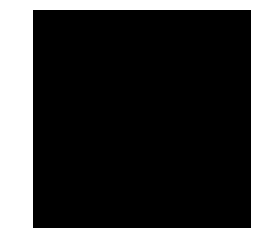

In [3]:
image = np.zeros((300,300,3), dtype='uint8')
show(image)

### 1、画直线

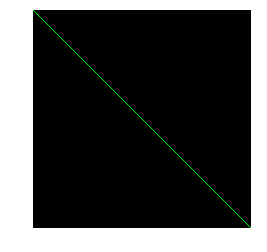

In [4]:
green = (0,255,0)
cv2.line(image, (0,0), (300,300), green, 1)
show(image)

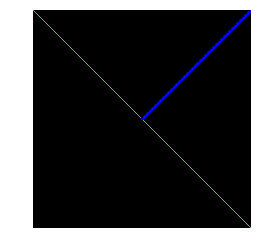

In [5]:
blue = (0,0,255)
cv2.line(image, (300,0), (150,150), blue, 2)
show(image)

### 2、画矩形

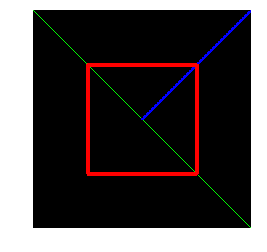

In [6]:
cv2.rectangle(image, (75,75), (225,225), (255,0,0),3)    # 
show(image)

### 3、画圆形

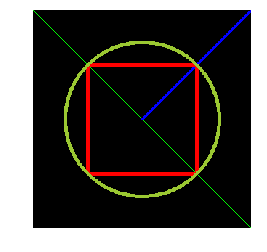

In [7]:
cv2.circle(image, (150,150), 106, (155,200,50),3)
show(image)

##### 画一个不断叠加的圆

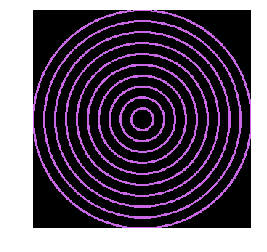

In [8]:
image2 = np.zeros((300,300,3), dtype='uint8')
(cx, cy) = image.shape[0]//2, image.shape[1]//2
for i in range(10):
    cv2.circle(image2, (cx, cy), 15*(i+1), (201,103,230),2)
show(image2)

##### 画一些圆心、半径都是随机的圆

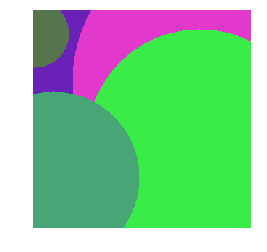

In [9]:
image3 = np.zeros((300,300,3), dtype='uint8')
for i in range(10):
    radius = np.random.randint(5,200)    # 半径取随机值
    pt = np.random.randint(0,300,size=(2,))    # 圆心取随机值
    color = np.random.randint(0,255,size=(3,)).tolist()    # 颜色取随机值
#     cv2.circle(image3, (150,150), 15, color, -1)
    cv2.circle(image3, tuple(pt), radius, color, -1)
show(image3)

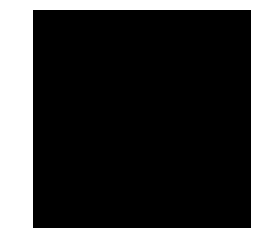

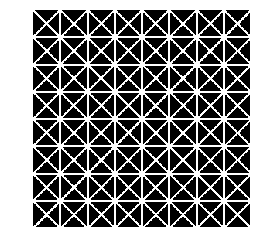

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(image):
    '''用来显示图片'''
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def value(a,b,lst=[]):
    '''用递归的方式计算得到线段的中点'''
    c = (a+b)/2
    lst.append(c)
    if a+100<c:    # 设置递归停止的条件，否则会一直进行下去
        value(a,c,lst)
    if b>c+100:
        value(c,b,lst)
    return lst

image = np.zeros((500,500,3), dtype='uint8')    # 创建一张黑色的图片
show(image)
lst = value(0,image.shape[1])    # 此时lst是乱序的而且有重复值
lst = sorted(list(set(lst)))
lst.append(image.shape[1])

# 1、先画出从左往右向上的斜线
for i in lst:
    cv2.line(image, (0,int(i)), (int(i),0), (255,255,255),3)
    cv2.line(image, (int(i),image.shape[1]), (image.shape[0],int(i)), (255,255,255),3)

# 2、再画出从左往右向下的斜线
for i in lst:
    cv2.line(image, (int(i),0), (image.shape[0],image.shape[0]-int(i)), (255,255,255),3)
    cv2.line(image, (0,int(i)), (image.shape[0]-int(i),image.shape[1]), (255,255,255),3)
cv2.line(image, (0,0), (image.shape[1],image.shape[1]), (255,255,255),3)

# 3、连接横着的线条
for i in lst:
    cv2.line(image, (0,int(i)), (image.shape[0],int(i)), (255,255,255), 3)

# 4、连接竖着的线
for i in lst:
    cv2.line(image, (int(i),0), (int(i),image.shape[1]), (255,255,255),3)
show(image)